In [117]:
# ======================================
# Data Overview and Data Types
# ======================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------
# Load raw dataset
# --------------------------------------

df = pd.read_csv("../data/raw/churn .csv")

# --------------------------------------
# Initial inspection
# --------------------------------------

df.head()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   str    
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   str    
 5   Gender                9963 non-null   str    
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary       9896 non-


=== Geography ===
Geography
France     4963
Germany    2484
Spain      2457
NaN          37
FR           35
ES           13
DE           11
Name: count, dtype: int64
Missing: 37


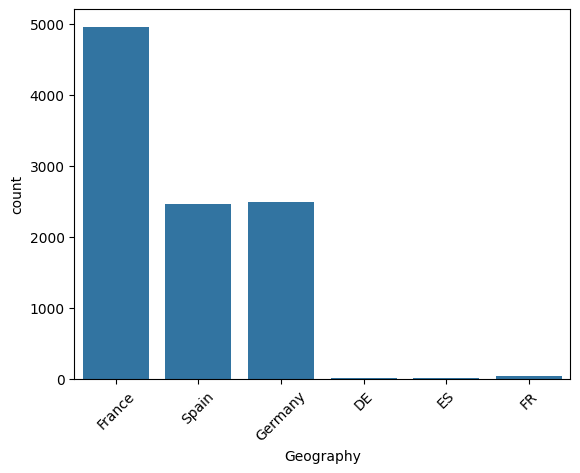


=== Gender ===
Gender
Male      5439
Female    4524
NaN         37
Name: count, dtype: int64
Missing: 37


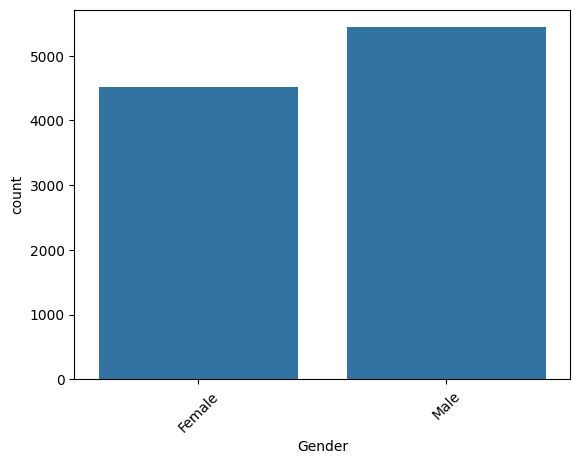


=== Exited ===
Exited
No     7963
Yes    2037
Name: count, dtype: int64
Missing: 0


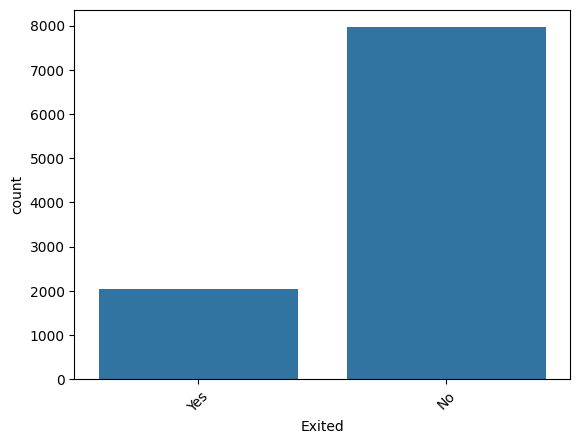

In [118]:
# --------------------------------------
# Categorical variables – distribution & missing
# --------------------------------------

cat_cols = [
    'Geography', 'Gender', 'Exited'
]

for col in cat_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False))
    print("Missing:", df[col].isnull().sum())

    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()


=== Sex ===
Sex
0.0    5354
1.0    4451
NaN     195
Name: count, dtype: int64
Missing: 195


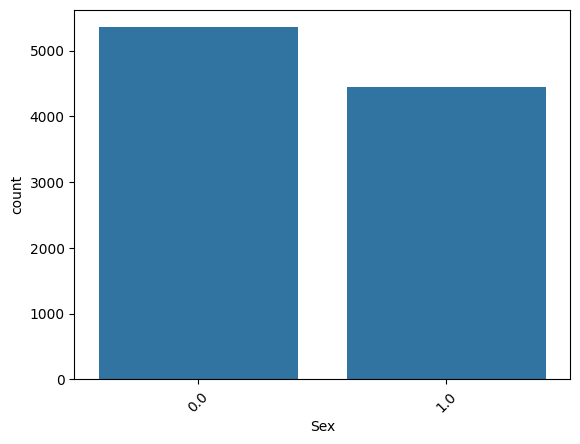


=== CurrentWorkingStatus ===
CurrentWorkingStatus
1.0    9929
NaN      37
0.0      34
Name: count, dtype: int64
Missing: 37


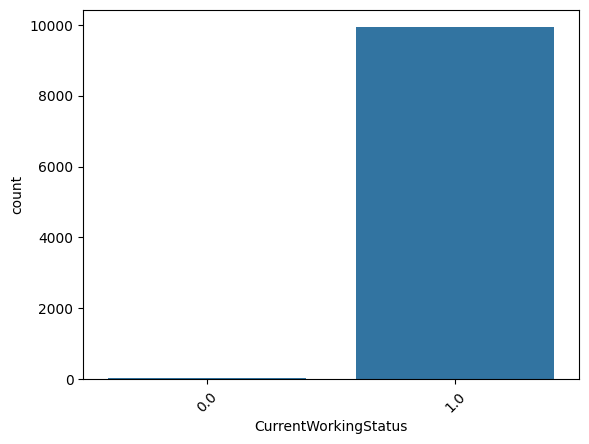


=== ComplaintsLodged ===
ComplaintsLodged
0.0    7899
1.0    2064
NaN      37
Name: count, dtype: int64
Missing: 37


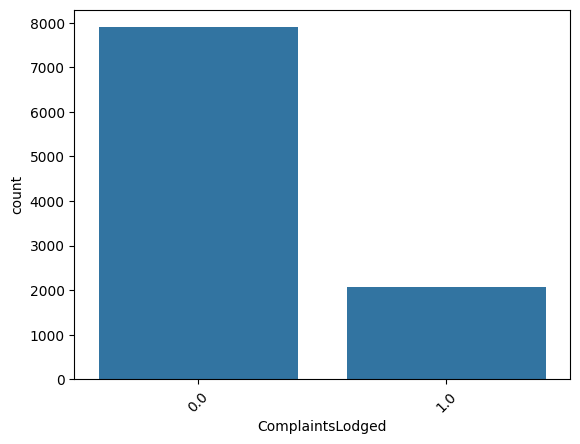


=== HasCrCard ===
HasCrCard
1.0    7029
0.0    2934
NaN      37
Name: count, dtype: int64
Missing: 37


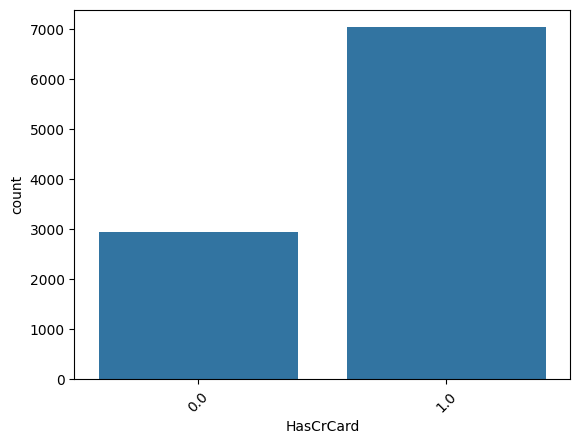


=== IsActiveMember ===
IsActiveMember
1.0    5131
0.0    4832
NaN      37
Name: count, dtype: int64
Missing: 37


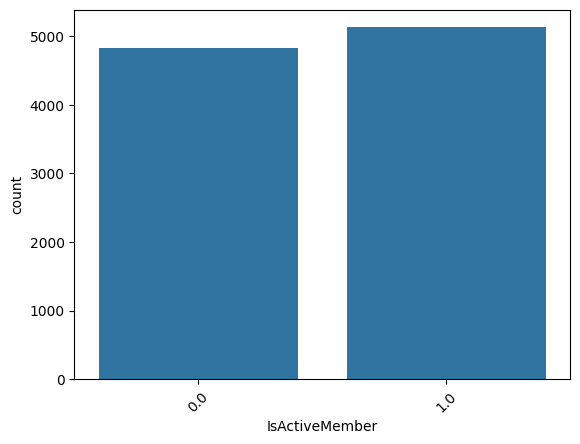

In [119]:
# --------------------------------------
# Binary variables – distribution
# --------------------------------------

binary_cols = [
    'Sex','CurrentWorkingStatus',
    'ComplaintsLodged', 'HasCrCard', 'IsActiveMember'
]

for col in binary_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False))
    print("Missing:", df[col].isnull().sum())

    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()



=== CreditScore ===
count    9963.000000
mean      650.624812
std        96.606044
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64
Missing: 37
Skew: -0.07309696623279562


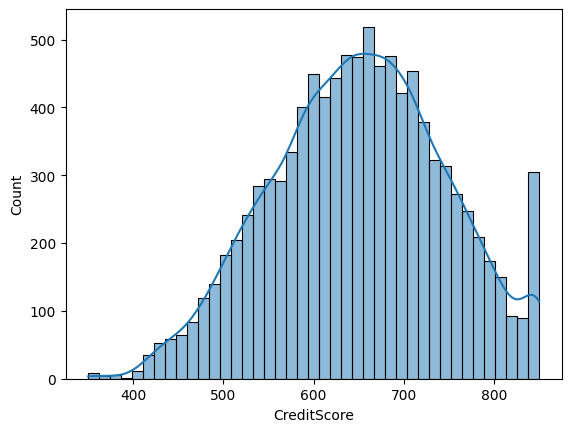

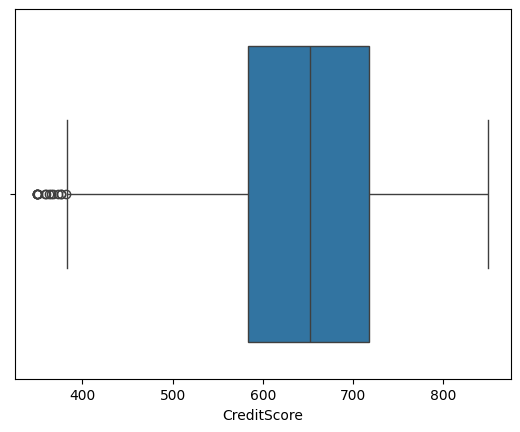


=== Age ===
count    9963.000000
mean       38.898223
std        10.541477
min        -1.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64
Missing: 37
Skew: 0.9727098489542749


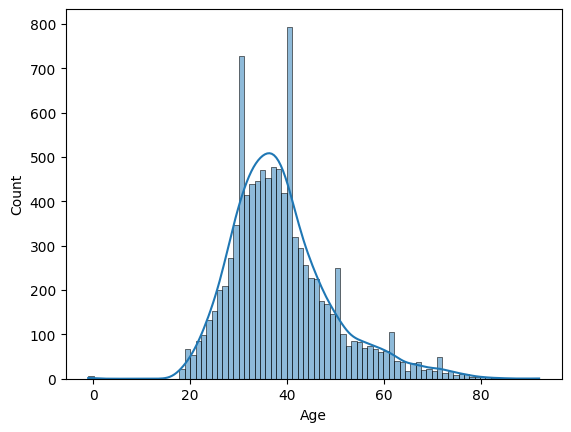

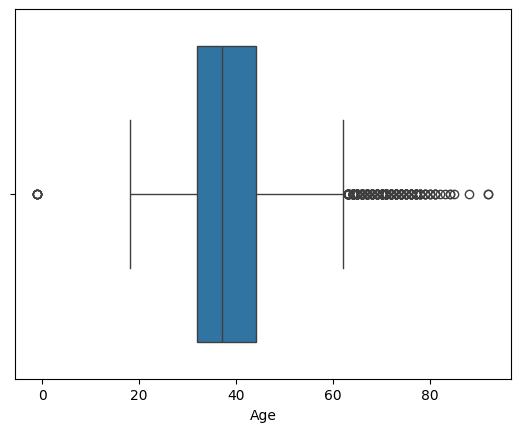


=== Tenure ===
count    9963.000000
mean        5.014453
std         2.891880
min         0.000000
25%         3.000000
50%         5.000000
75%         7.500000
max        10.000000
Name: Tenure, dtype: float64
Missing: 37
Skew: 0.010036249432684474


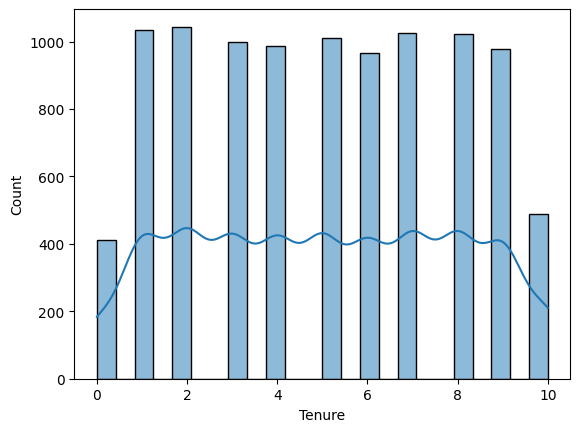

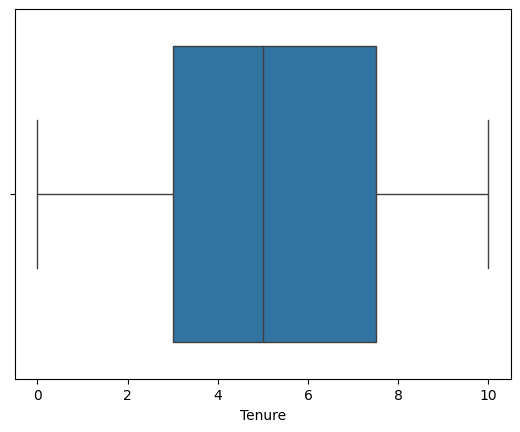


=== Balance ===
count      9963.000000
mean      76501.435194
std       62411.069692
min           0.000000
25%           0.000000
50%       97234.580000
75%      127657.840000
max      250898.090000
Name: Balance, dtype: float64
Missing: 37
Skew: -0.14137821959857297


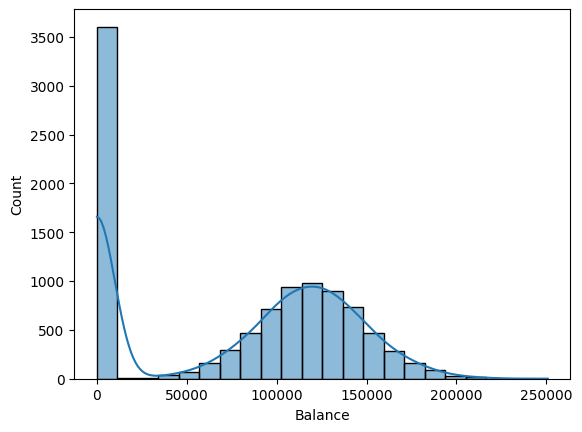

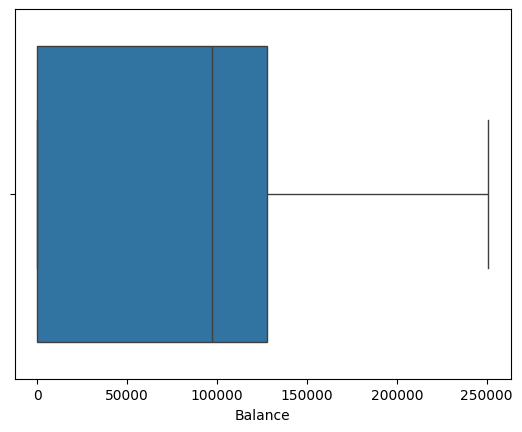


=== NumOfProducts ===
count    9859.000000
mean        1.531088
std         0.582007
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: NumOfProducts, dtype: float64
Missing: 141
Skew: 0.746708374888041


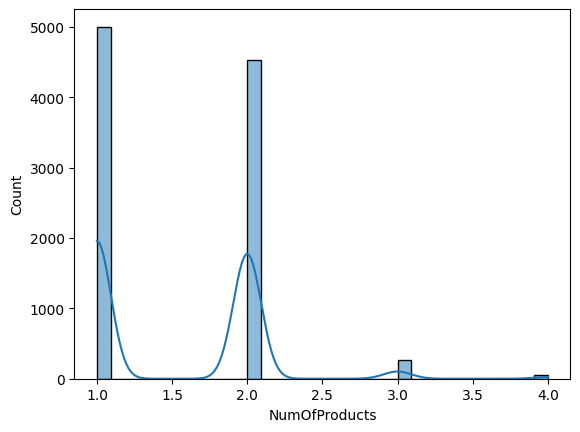

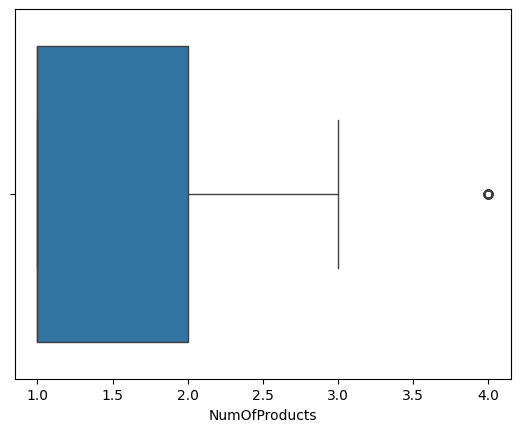


=== EstimatedSalary ===
count      9832.000000
mean     100198.151107
std       57539.098103
min          11.580000
25%       51109.490000
50%      100438.025000
75%      149472.020000
max      199992.480000
Name: EstimatedSalary, dtype: float64
Missing: 168
Skew: 0.0005771252426374523


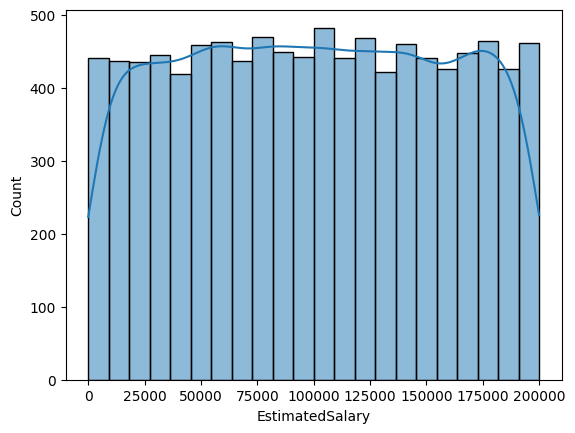

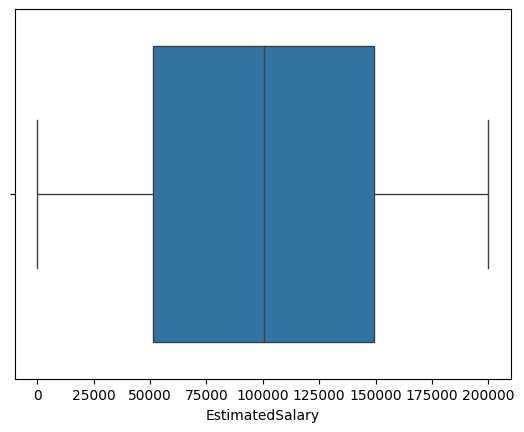

In [120]:
# --------------------------------------
# Numerical variables – distribution & skewness
# --------------------------------------

#- - Convert EstimatedSalary to numeric; invalid values are set to NaN
df["EstimatedSalary"] = pd.to_numeric(df["EstimatedSalary"], errors="coerce")


num_cols = [
    'CreditScore', 'Age',
    'Tenure', 'Balance', 'NumOfProducts',
    'EstimatedSalary'
]

for col in num_cols:
    print(f"\n=== {col} ===")
    print(df[col].describe())
    print("Missing:", df[col].isnull().sum())
    print("Skew:", df[col].skew())

    sns.histplot(df[col], kde=True)
    plt.show()

    sns.boxplot(x=df[col])
    plt.show()

# ======================================
# Data Preparation 
# ======================================

In [121]:
# --------------------------------------
# Categorical variables corrections - Geography 
# --------------------------------------

#- - Fix Data Quality : Inconsistent values 
df['Geography'] = df['Geography'].replace({
    'FR': 'France',
    'DE': 'Germany',
    'ES': 'Spain'
})

# - - Fix Data Quality : Missing value - mode imputation
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])

In [122]:
# --------------------------------------
# Categorical variables corrections - Gender 
# --------------------------------------

# - - Fix Data Quality : Missing value - mode imputation
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [123]:
# --------------------------------------
# Categorical variables corrections - Exited 
# --------------------------------------

# - - Convert target variable from Yes/No to (1/0)
df['Exited'] = df['Exited'].map({'Yes': 1, 'No': 0})

In [124]:
# --------------------------------------
# - - Binary variables corrections 
# --------------------------------------

# - - Fix Data Quality : Missing value - mode imputation

binary_cols = [
    'Sex','CurrentWorkingStatus',
    'ComplaintsLodged', 'HasCrCard', 'IsActiveMember'
]
for col in binary_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# - - Convert binary features from float to integer
df[binary_cols] = df[binary_cols].astype(int)

In [125]:
# --------------------------------------
# - - Numerical variables corrections - no significant skewness
# --------------------------------------

# - - Fix Data Quality : Missing value - mean imputation
num_mean_cols = [
    'CreditScore', 
    'Tenure','Balance', 
    'EstimatedSalary'
]
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [126]:
# --------------------------------------
# - - Numerical variables corrections - significant skewness
# --------------------------------------

# - - Fix Data Quality : Missing value - median imputation
num_median_cols = [
    'Age',
    'NumOfProducts'
]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# - - Fix Data Quality : Inconsistent values (Age < 1 is considered implausible in this dataset)
df = df[df['Age'] >= 1]

#- - Convert Age to int; Age is stored as whole numbers
for col in num_cols:
    df[col] = df[col].astype(int)

In [127]:
# --------------------------------------
# Double Check
# --------------------------------------
for col in cat_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False))
    print("Missing:", df[col].isnull().sum())

for col in binary_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False))
    print("Missing:", df[col].isnull().sum())

for col in num_mean_cols:
    print(f"\n=== {col} ===")
    print(df[col].describe())
    print("Missing:", df[col].isnull().sum()) 

for col in num_median_cols:
    print(f"\n=== {col} ===")
    print(df[col].describe())
    print("Missing:", df[col].isnull().sum())


=== Geography ===
Geography
France     5032
Germany    2494
Spain      2468
Name: count, dtype: int64
Missing: 0

=== Gender ===
Gender
Male      5472
Female    4522
Name: count, dtype: int64
Missing: 0

=== Exited ===
Exited
0    7960
1    2034
Name: count, dtype: int64
Missing: 0

=== Sex ===
Sex
0    5545
1    4449
Name: count, dtype: int64
Missing: 0

=== CurrentWorkingStatus ===
CurrentWorkingStatus
1    9960
0      34
Name: count, dtype: int64
Missing: 0

=== ComplaintsLodged ===
ComplaintsLodged
0    7933
1    2061
Name: count, dtype: int64
Missing: 0

=== HasCrCard ===
HasCrCard
1    7061
0    2933
Name: count, dtype: int64
Missing: 0

=== IsActiveMember ===
IsActiveMember
1    5165
0    4829
Name: count, dtype: int64
Missing: 0

=== CreditScore ===
count    9994.000000
mean      650.594757
std        96.406872
min       350.000000
25%       584.000000
50%       651.000000
75%       717.000000
max       850.000000
Name: CreditScore, dtype: float64
Missing: 0

=== Tenure ===
co

In [128]:
# --------------------------------------
# Save processed dataset
# --------------------------------------
df.info()
df.to_csv("../data/processed/churn_cleaned.csv", index=False)

<class 'pandas.DataFrame'>
Index: 9994 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   RowNumber             9994 non-null   int64
 1   CustomerId            9994 non-null   int64
 2   Surname               9908 non-null   str  
 3   CreditScore           9994 non-null   int64
 4   Geography             9994 non-null   str  
 5   Gender                9994 non-null   str  
 6   Sex                   9994 non-null   int64
 7   Age                   9994 non-null   int64
 8   CurrentWorkingStatus  9994 non-null   int64
 9   Tenure                9994 non-null   int64
 10  Balance               9994 non-null   int64
 11  NumOfProducts         9994 non-null   int64
 12  ComplaintsLodged      9994 non-null   int64
 13  HasCrCard             9994 non-null   int64
 14  IsActiveMember        9994 non-null   int64
 15  EstimatedSalary       9994 non-null   int64
 16  Exited                